July 26th Expanding a classifier
======================
* Adding classes & subclassing 
* Incorporating Temperature & Infrared (& possibly optical depth...)
* Comparing classes over time

In [1]:
#read in data

import os
import landsat as lf

folder = "data" 
rgbfile = "landsat_RGBN.txt" 
rgbn = lf.landsat_read(os.path.join(folder, rgbfile))

In [2]:
rgb_img = lf.rgb_contrast(rgbn[...,:3],3)
ndvi = lf.NDVI(rgbn[...,0], rgbn[...,3])

In [3]:
#temperature?
tfile = "landsat_thermrad.txt" 
thermrad = lf.landsat_read(os.path.join(folder,tfile))
temperature = lf.BT(thermrad,10.9,1)

<IPython.core.display.Javascript object>


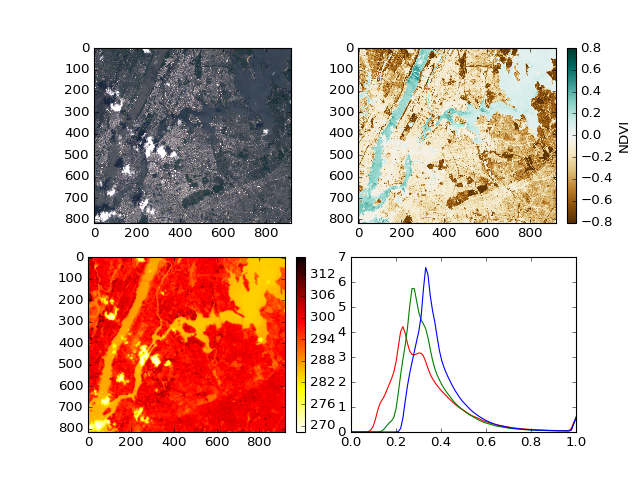

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(2,2,1)
ax.imshow(rgb_img)
ax2 = fig.add_subplot(2,2,2, sharex=ax, sharey=ax)
im = ax2.imshow(ndvi, cmap="BrBG",  vmin=-0.8, vmax=0.8)
cb = fig.colorbar(im, ax=ax2, fraction=0.04)
cb.set_label("NDVI")
ax3 = fig.add_subplot(2,2,3, sharex=ax, sharey=ax)
im2 = ax3.imshow(temperature, cmap="hot_r")
fig.colorbar(im2, ax=ax3, fraction=0.04)
ax4 = fig.add_subplot(2,2,4)
lf.RGB_hists(rgb_img, ax4)
for axi in [ax, ax2, ax3, ax4]:
    axi.set_adjustable('box-forced')

In [5]:
import numpy as np
#lets try to classify multiple things
multi_class  = np.empty(ndvi.shape) * np.nan
m1 = (ndvi>0.4)
multi_class[ndvi>0.4] = 0
m2 = (~m1) & ( temperature>300) # exclude first mask 
multi_class[m2] = 1
m3 = ~(m1 | m2) & (rgb_img[...,2] < 0.4) # blue mask 
multi_class[m3] = 2

<IPython.core.display.Javascript object>


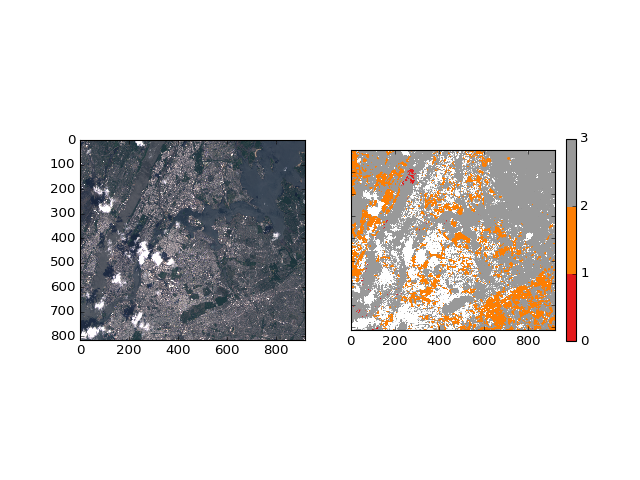

In [6]:
import matplotlib.colors as mcolors
import matplotlib.cm as mcm
cmap = mcm.Set1
norm = mcolors.BoundaryNorm([0,1,2,3], cmap.N)
fig, axes = plt.subplots(1,2, sharex=True, sharey=True)
axes[0].imshow(rgb_img)
im = axes[1].imshow(multi_class, cmap=cmap, norm=norm)
fig.colorbar(im, fraction=0.045)
for ax in axes.flatten():
    ax.set_adjustable('box-forced')

In [12]:
# is this a good classifier? 
# test the class criteria on a new file:

import scipy.ndimage as nd
folder = "data"
dfile = "RGB_subset_2014-04-26-ac.png"
ifile = "landsat_reflectances_2014-04-26.txt"
img_array = nd.imread(os.path.join(folder, dfile))
nir = lf.landsat_read(os.path.join(folder, ifile))

tfile2 = "landsat_thermrad_2014-04-26.txt"
thermrad2 = lf.landsat_read(os.path.join(folder,tfile2))
temp2 = lf.BT(thermrad2,10.9,1)

<IPython.core.display.Javascript object>


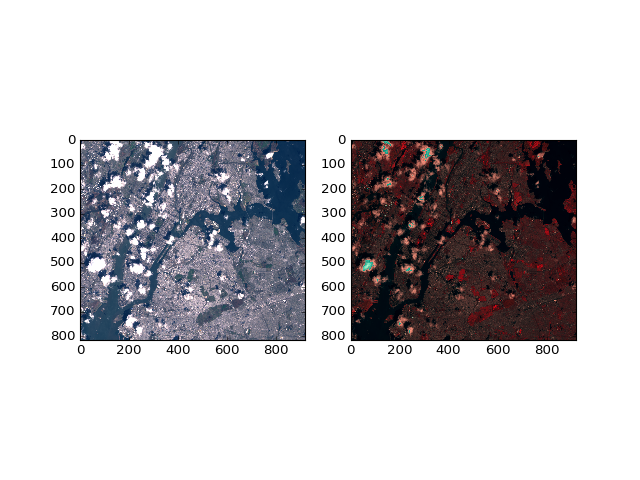

In [15]:
#are the RGBS the same?
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_array)
ax[1].imshow(nir[...,:3])

In [17]:
#evaluation
ndvi2 = lf.NDVI(img_array[...,0], nir[...,4])
multi_class  = np.empty(ndvi2.shape) * np.nan
m1 = (ndvi2>0.4)
multi_class[ndvi2>0.4] = 0
m2 = (~m1) & ( temp2>300) # exclude first mask 
multi_class[m2] = 1
m3 = ~(m1 | m2) & (img_array[...,2] < 0.4) # blue mask 
multi_class[m3] = 2

<IPython.core.display.Javascript object>


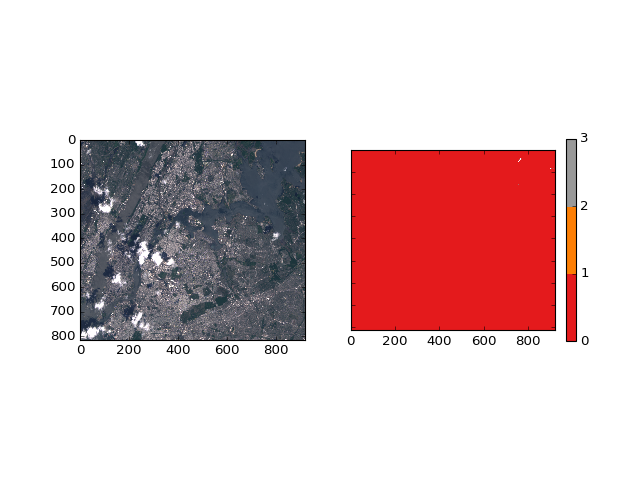

In [18]:
fig, axes = plt.subplots(1,2, sharex=True, sharey=True)
axes[0].imshow(rgb_img)
im = axes[1].imshow(multi_class, cmap=cmap, norm=norm)
fig.colorbar(im, fraction=0.045)
for ax in axes.flatten():
    ax.set_adjustable('box-forced')

Apply your classifier criteria
===============================
* compute NDVI & what does it have to be more than, 
* RGB criteria
* temperature,...etc

Apply to at least one image from each season (spring, summer, winter, fall) and adjust as needed. 